### Title: "APbioSN"
### Author: "許sir"

本DATA本DATA是北醫AP Bio團隊在2-6月間共舉行的6次會議
- 業師與團隊之間的會議紀錄
- 其中:
M是業師、P是教授、S是學生、FU是學校研發處的技術經理

### 測試區

In [4]:
print('Hello world! Love, R in Jupyter.')

[1] "Hello world! Love, R in Jupyter."


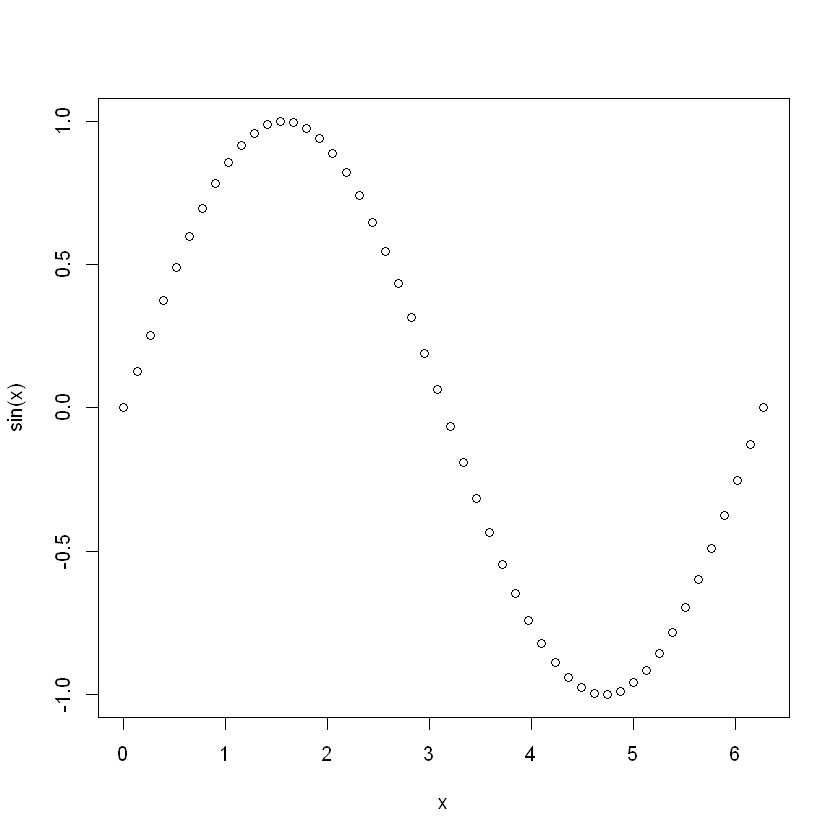

In [6]:
x <- seq(0, 2*pi, length.out=50)
plot(x, sin(x))

### 1.設定所需的函式庫(libraries)以及載入資料

In [10]:
library(IRdisplay)
library(IRkernel)

In [11]:
library(sna)
library(igraph)

Loading required package: statnet.common

Attaching package: 'statnet.common'

The following object is masked from 'package:base':

    order

Loading required package: network
network: Classes for Relational Data
Version 1.13.0 created on 2015-08-31.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.

sna: Tools for Social Network Analysis
Version 2.4 created on 2016-07-23.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citation information, type citation("sna").
 Type help(package="sna") to get started.


Attaching package: 'igraph'

The following objects are masked from 'package:sna'

In [12]:
setwd("D:/My Working Area/AP bio Social Network")
data0223<- "0223.csv"
data0309<- "0309.csv"
data0314<- "0314.csv"
data0414<- "0414.csv"
data0512<- "0512.csv"
data0606<- "0606.csv"

### 2.資料轉置與建立SNA規則
- *以0223的data為例*


 int [1:12, 1:12] 0 0 0 2 1 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:12] "M1" "M2" "M3" "P1" ...
  ..$ : chr [1:12] "M1" "M2" "M3" "P1" ...


[1] 12 12

[1] "matrix"

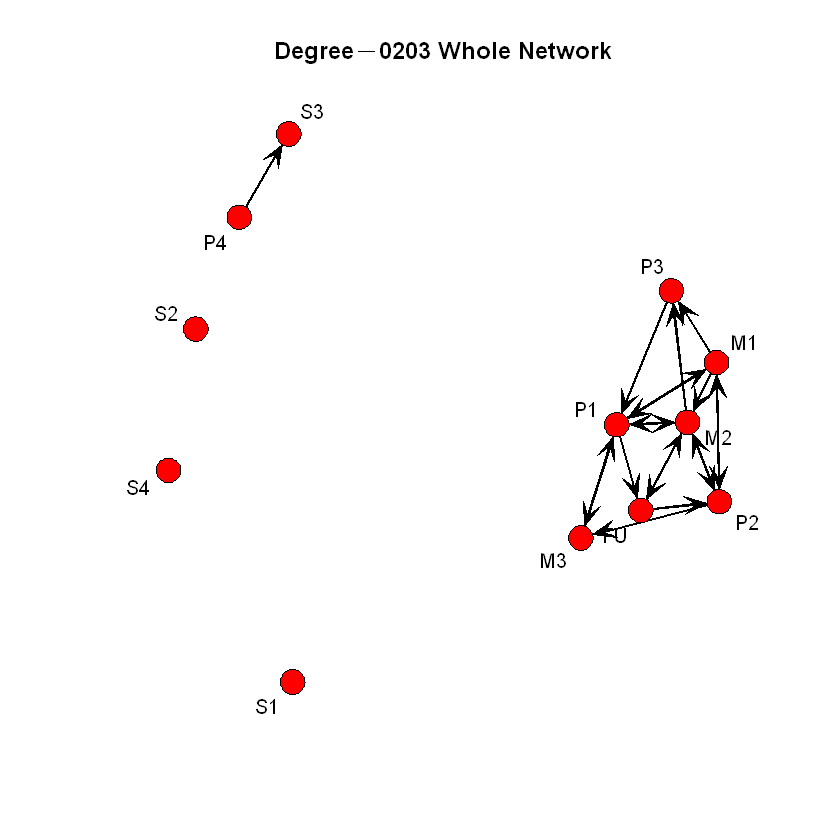

In [13]:
el<-read.table(data0223, header=T, row.names=1, sep=",")
m=as.matrix(el)
gplot(m, displaylabels=TRUE, main='Degree－0203 Whole Network')

str(m)
dim(m)
class(m)

- *以討論最激烈的0414為例*

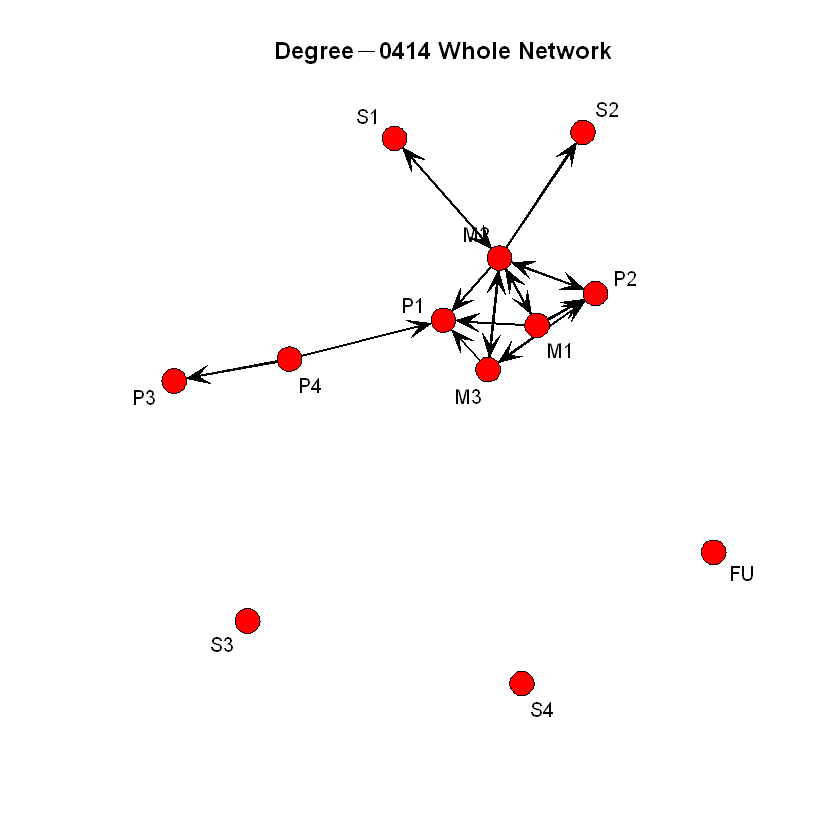

In [14]:
el0414<-read.table(data0414, header=T, row.names=1, sep=",")
m0414=as.matrix(el0414)
gplot(m0414, displaylabels=TRUE, main='Degree－0414 Whole Network')

- *以0512的data為例*

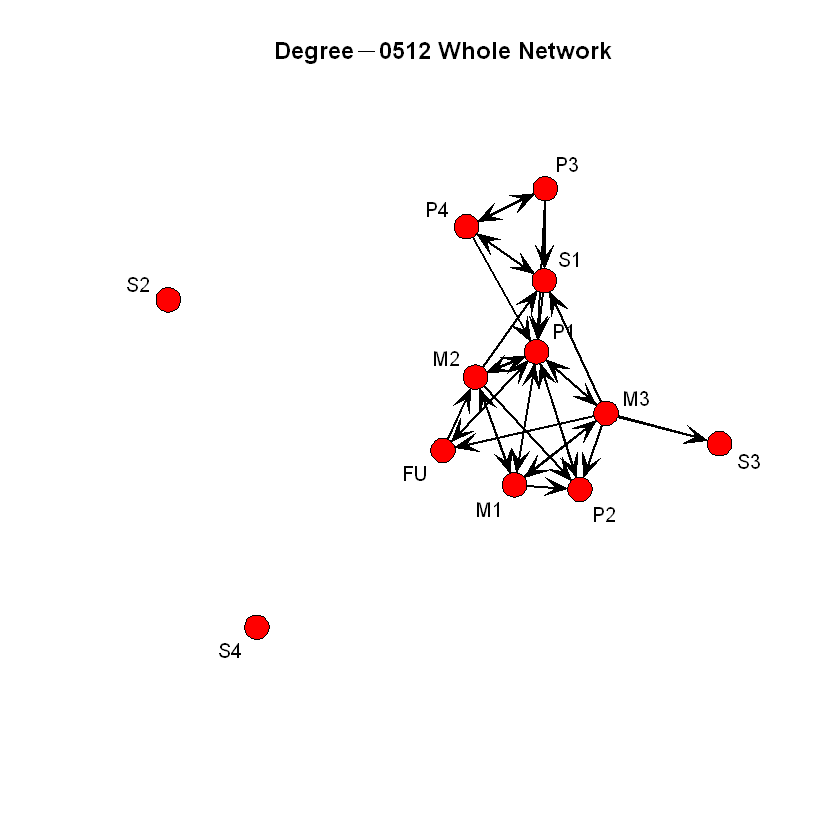

In [18]:
el0512<-read.table(data0512, header=T, row.names=1, sep=",")
m0512=as.matrix(el0512)
gplot(m0512, displaylabels=TRUE, main='Degree－0512 Whole Network')

### 2-1.Basic Centrality Measures

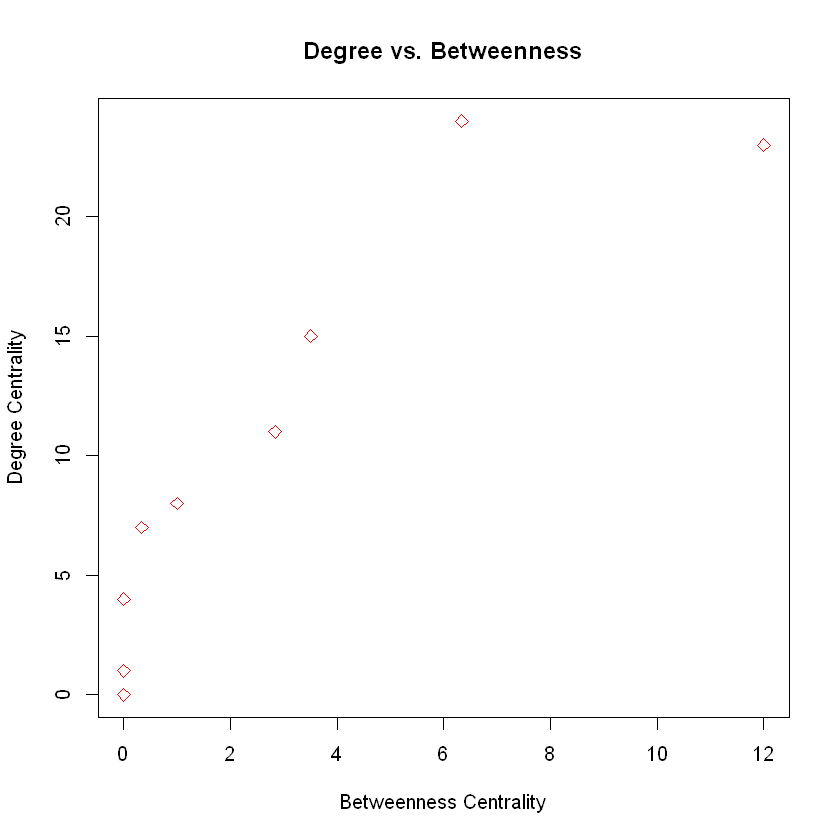

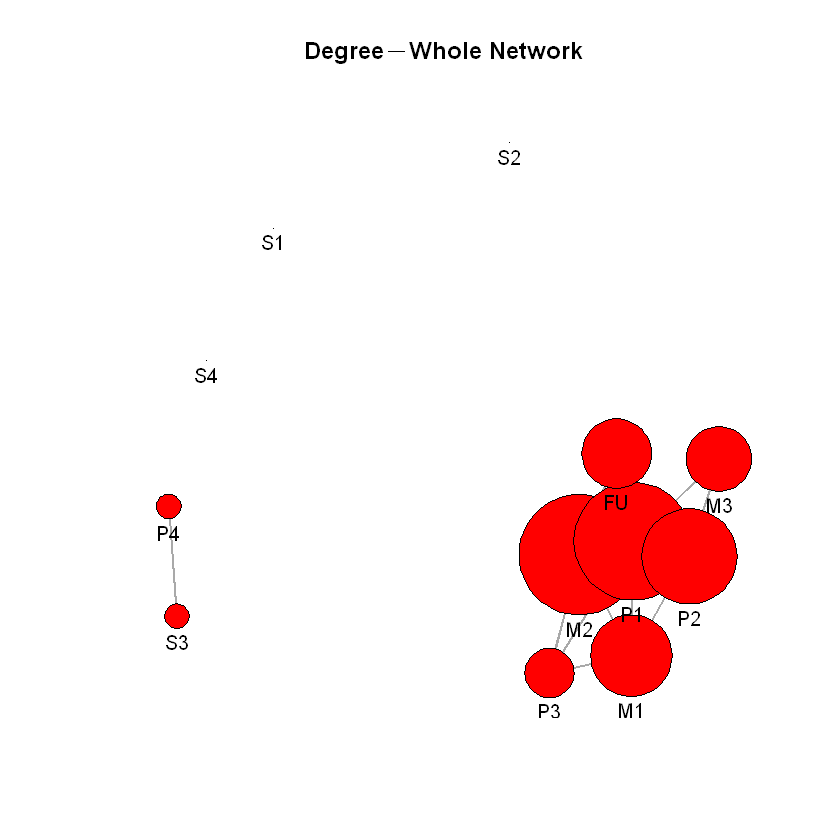

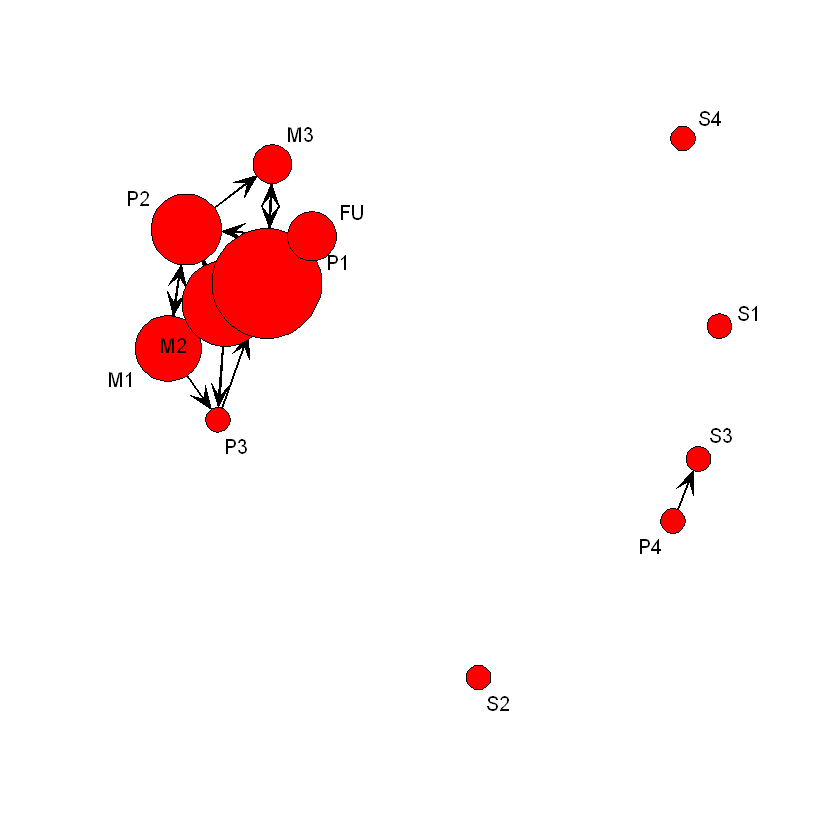

In [16]:
dg<- sna::degree(m)
bt<- sna::betweenness(m)
plot(bt,dg, xlab="Betweenness Centrality", ylab="Degree Centrality", main = "Degree vs. Betweenness", col="red", pch=5)

gplot(m, 
      vertex.cex=sqrt(dg) , 
      displaylabels=TRUE,
      usearrows=FALSE, 
      label.pos=1,
      label.bg="gray90",
      edge.col="darkgray", 
      main='Degree－Whole Network')

gplot(m, vertex.cex=sqrt(bt)+1 , displaylabels=TRUE)

### 2-2.Structure Equivalence

0,15,8,24,16,9,12,11,11,12,11,11
15,0,17,25,17,22,25,24,24,25,24,16
8,17,0,18,20,9,8,7,7,8,7,9
24,25,18,0,14,19,24,23,23,24,23,17
16,17,20,14,0,13,16,15,15,16,15,13
9,22,9,19,13,0,5,4,4,5,4,10
12,25,8,24,16,5,0,1,1,0,1,9
11,24,7,23,15,4,1,0,0,1,0,8
11,24,7,23,15,4,1,0,0,1,0,8
12,25,8,24,16,5,0,1,1,0,1,9
11,24,7,23,15,4,1,0,0,1,0,8


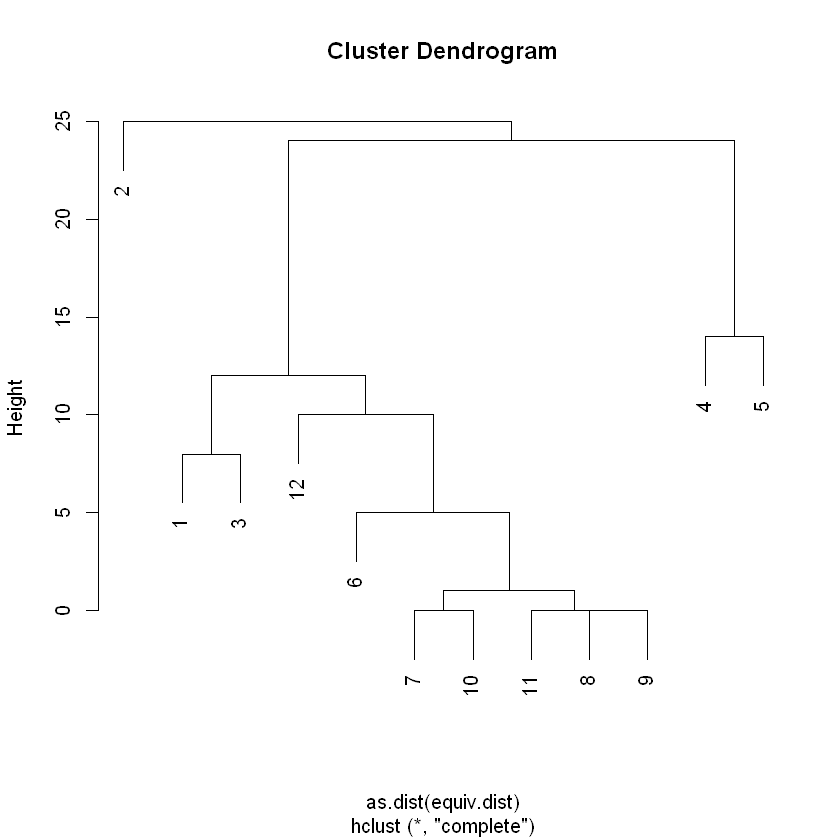

In [17]:
sedist(m) 
eq<-equiv.clust(m)
plot(eq)